In [3]:
import basedosdados as bd

In [5]:
df = bd.read_sql('''
WITH cravinhos as (SELECT * FROM basedosdados.br_inep_censo_escolar.escola 
WHERE ano = 2010 
AND id_municipio = "3543402") 

SELECT c.sigla_uf, c.id_municipio, c.id_escola, geometria
FROM cravinhos c
JOIN basedosdados.br_geobr_mapas.escola e
ON c.id_escola = e.id_escola AND c.sigla_uf = e.sigla_uf
''', billing_project_id="base-dos-dados-363119")

Downloading: 100%|██████████| 363/363 [00:00<00:00, 491.94rows/s]


In [6]:
df.head()

,sigla_uf,id_municipio,id_escola,geometria
0,SP,3543402,35049612,POINT (-47.8230233 -21.141671)
1,SP,3543402,35050696,POINT (-47.7941218 -21.1771237)
2,SP,3543402,35042870,POINT (-47.8331443 -21.166536)
3,SP,3543402,35042882,POINT (-47.7966397 -21.1450193)
4,SP,3543402,35084219,POINT (-47.7965475 -21.1105367)


In [8]:
import geobr
import geopandas as gpd
from shapely.wkt import loads

In [70]:
df = df.rename(columns = {"geometria":"geometry"})
df.head()

,sigla_uf,id_municipio,id_escola,geometry
0,SP,3543402,35023796,POINT (-47.8097255 -21.1730311)
1,SP,3543402,35023826,POINT (-47.8058847 -21.1736643)
2,SP,3543402,35023848,POINT (-47.80844 -21.16286)
3,SP,3543402,35023851,POINT (-47.8232967 -21.16289)
4,SP,3543402,35023875,POINT (-47.8325486 -21.1857836)


In [71]:
df["geometry"] = df["geometry"].apply(loads)

In [72]:

geo_df = gpd.GeoDataFrame(df, crs='epsg:4674')
geo_df.head()

,sigla_uf,id_municipio,id_escola,geometry
0,SP,3543402,35023796,POINT (-47.80973 -21.17303)
1,SP,3543402,35023826,POINT (-47.80588 -21.17366)
2,SP,3543402,35023848,POINT (-47.80844 -21.16286)
3,SP,3543402,35023851,POINT (-47.82330 -21.16289)
4,SP,3543402,35023875,POINT (-47.83255 -21.18578)


In [73]:
cravinhos = geobr.read_municipality(code_muni = 3543402)

In [74]:
cravinhos.head()

,code_muni,name_muni,code_state,abbrev_state,geometry
487,3543402.0,Ribeirão Preto,35.0,SP,"POLYGON ((-47.79698 -21.06144, -47.79464 -21.0..."


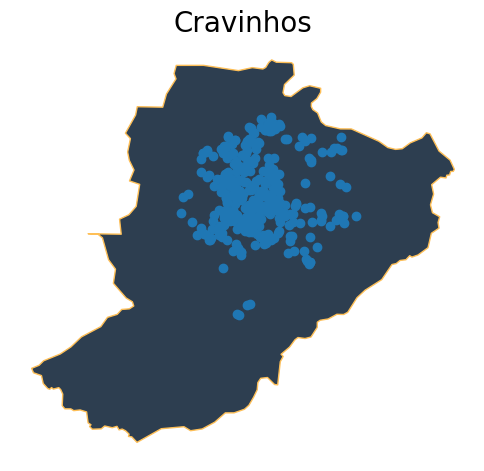

In [75]:
# plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)

cravinhos.plot(facecolor="#2D3E50", edgecolor="#FEBF57", ax=ax)
geo_df[~geo_df.geometry.is_empty].plot(ax=ax)

ax.set_title("Ribeirao Preto", fontsize=20)
ax.axis("off")

plt.show()

In [33]:
geo_df.head()

,sigla_uf,id_municipio,id_escola,geometria,geometry
0,SP,3513108,35024260,POINT (-47.7302834 -21.3477803),POINT (-47.73028 -21.34778)
1,SP,3513108,35024272,POINT (-47.7306084 -21.3369292),POINT (-47.73061 -21.33693)
2,SP,3513108,35063162,POINT (-47.7445147 -21.3421096),POINT (-47.74451 -21.34211)
3,SP,3513108,35089734,POINT (-47.7321422 -21.3414621),POINT (-47.73214 -21.34146)
4,SP,3513108,35093312,POINT (-47.7280549 -21.3365689),POINT (-47.72805 -21.33657)


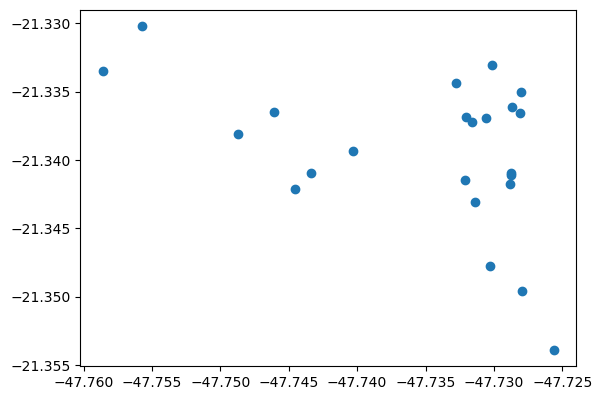

In [39]:
geo_df[~geo_df.geometry.is_empty].plot()
ax.axis("off")
plt.show()

In [76]:
import folium

In [77]:
folium.Map()